In [51]:
import pandas as pd 
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, r2_score


In [5]:
df = pd.read_csv('IMDb Movies India.csv', encoding='iso-8859-1')
df

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [7]:
df.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [8]:
print(df.isnull().sum())

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64


In [9]:
df['Rating'].fillna(df['Rating'].mean(), inplace=True)
print(df.isnull().sum())

Name           0
Year         528
Duration    8269
Genre       1877
Rating         0
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64


In [10]:
# Drop the rows with missing values
df.dropna(inplace=True)

# Printing the resulting DataFrame after dropping the missing values
print(df)

                                     Name    Year Duration  \
1      #Gadhvi (He thought he was Gandhi)  (2019)  109 min   
3                                 #Yaaram  (2019)  110 min   
5                    ...Aur Pyaar Ho Gaya  (1997)  147 min   
6                               ...Yahaan  (2005)  142 min   
8                      ?: A Question Mark  (2012)   82 min   
...                                   ...     ...      ...   
15493                              Zubaan  (2015)  115 min   
15494                            Zubeidaa  (2001)  153 min   
15503                     Zulm Ki Zanjeer  (1989)  125 min   
15505                               Zulmi  (1999)  129 min   
15508                        Zulm-O-Sitam  (1998)  130 min   

                           Genre  Rating  Votes         Director  \
1                          Drama     7.0      8    Gaurav Bakshi   
3                Comedy, Romance     4.4     35       Ovais Khan   
5         Comedy, Drama, Musical     4.7    827    

In [11]:
print(df.isnull().sum())

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64


## Visulization 

## Top 10 Genre movies 

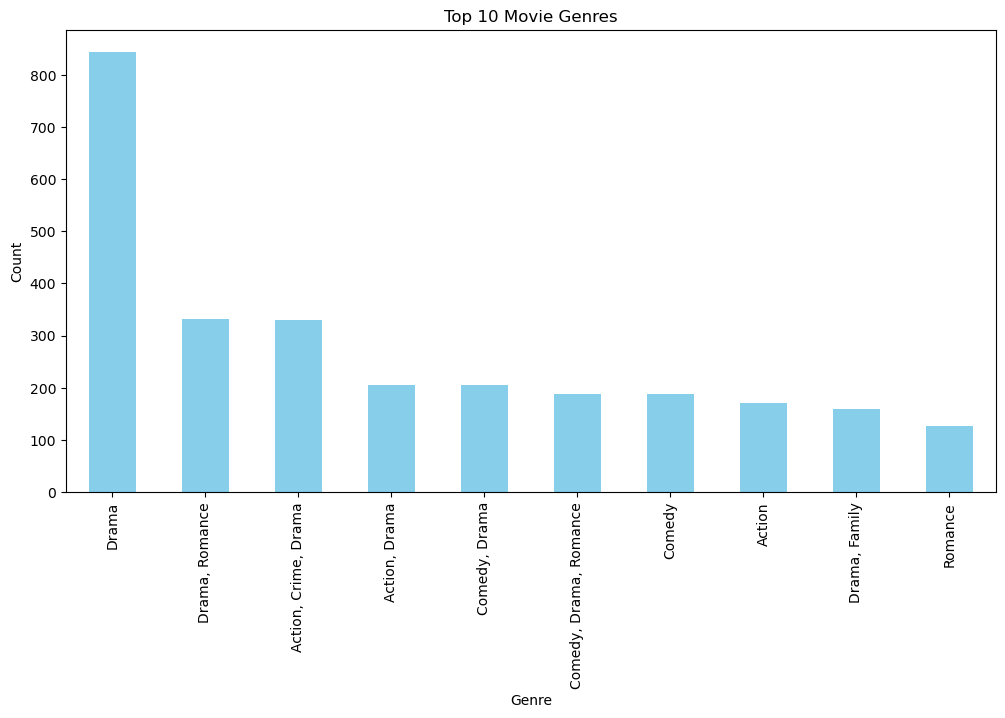

In [12]:
# Assuming 'Genre' is an object column
genre_counts = df['Genre'].value_counts()

# Plot a bar chart
plt.figure(figsize=(12, 6))
genre_counts.head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Movie Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show()


## Top 10 actor - 1 (column) by no.of movies 

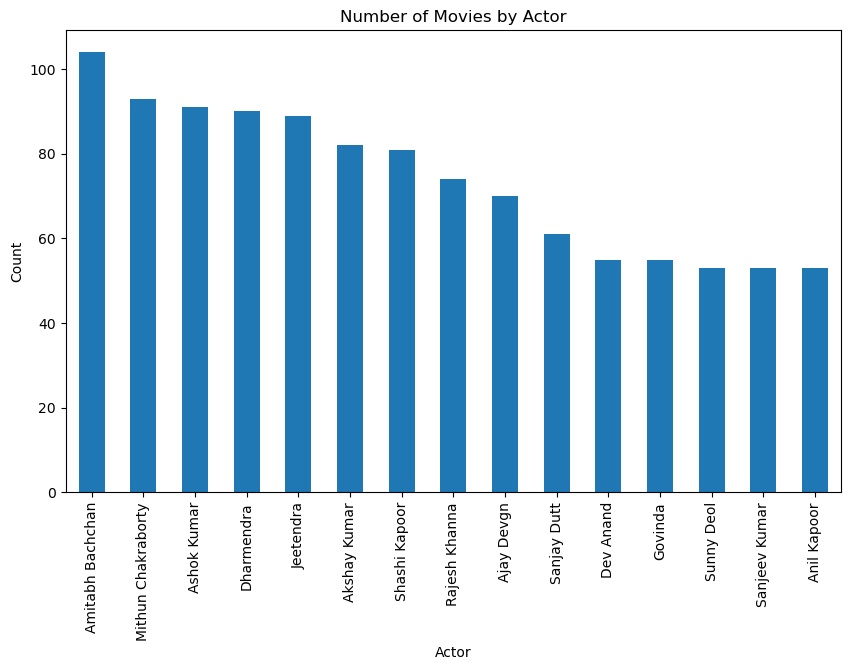

In [13]:
actor_count = df['Actor 1'].value_counts().head(15)

plt.figure(figsize=(10, 6))
actor_count.plot(kind='bar')

plt.title('Number of Movies by Actor')
plt.xlabel('Actor')
plt.ylabel('Count')

plt.show()


## Top 10 actor - 2 (column) by no.of movies

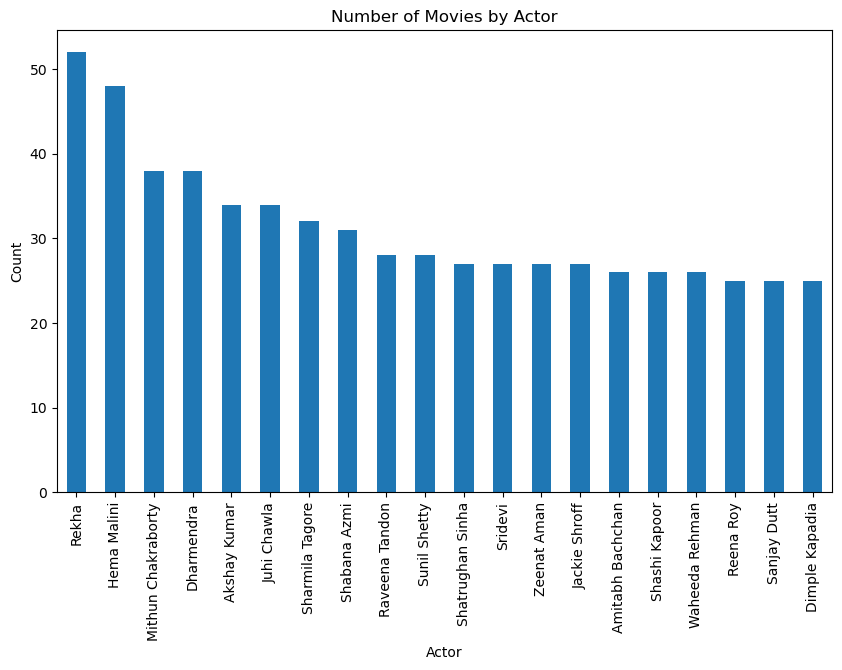

In [43]:
actor_counts = df[[ 'Actor 2']].stack().value_counts() .head(20)

plt.figure(figsize=(10, 6))
actor_counts.plot(kind='bar')

plt.title('Number of Movies by Actor')
plt.xlabel('Actor')
plt.ylabel('Count')

plt.show()


## Top 10 Directors  by no.of movies

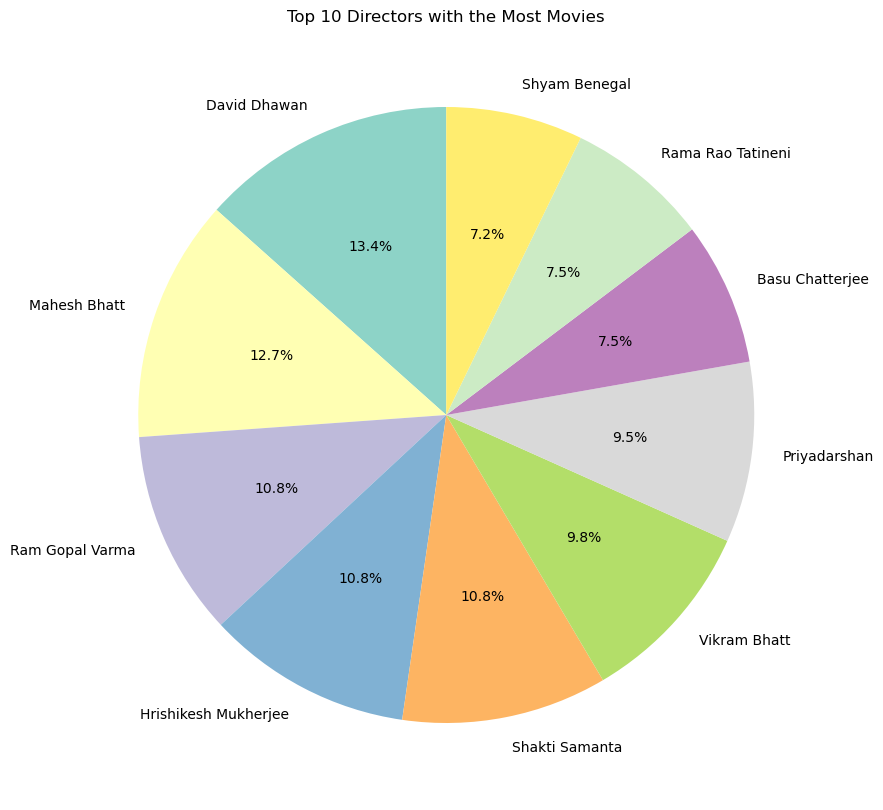

In [17]:
# Assuming 'Director' is an object column
director_counts = df['Director'].value_counts()

# Plot a pie chart for the top 10 directors
plt.figure(figsize=(10, 10))
director_counts.head(10).plot(kind='pie', autopct='%1.1f%%', startangle=90, cmap='Set3')
plt.title('Top 10 Directors with the Most Movies')
plt.ylabel('')
plt.show()


## Most used names for movie titles 

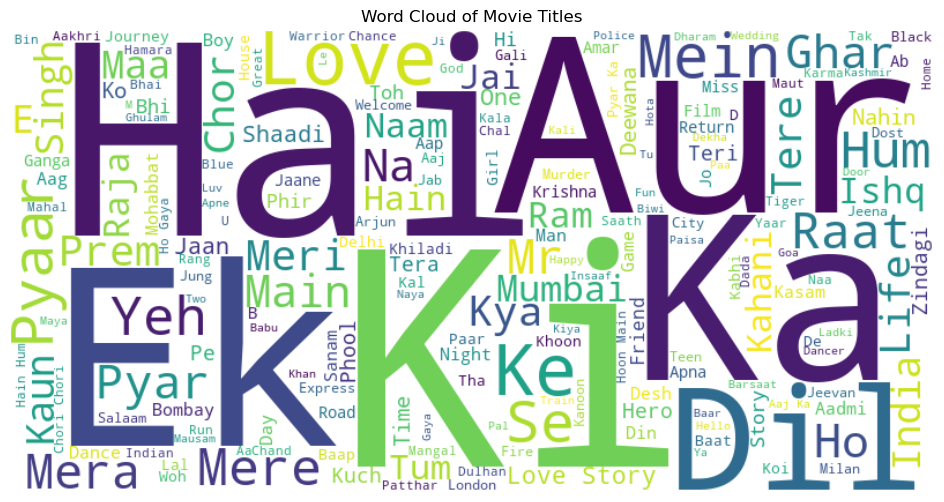

In [16]:
# Assuming 'Name' is an object column with movie titles
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['Name']))

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Movie Titles')
plt.show()


## Most frequent actors pair 

In [37]:
acts = df[['Actor 1', 'Actor 2', 'Actor 3']].value_counts().sort_values(ascending=False).head(10)
acts

Actor 1           Actor 2             Actor 3       
Dibakar Banerjee  Karan Johar         Anurag Kashyap    3
Anil Kapoor       Sridevi             Anupam Kher       3
Dharmendra        Sunny Deol          Bobby Deol        3
                  Saira Banu          Feroz Khan        2
Anil Kapoor       Sanjay Dutt         Akshaye Khanna    2
Asrani            Mithun Chakraborty  Pinky Chinoy      2
Sunil Dutt        Shashi Kapoor       Reena Roy         2
Rajesh Khanna     Hema Malini         Prem Chopra       2
Jeetendra         Jaya Prada          Pran              2
Ishrat Ali        Hemant Birje        Pinky Chinoy      2
dtype: int64

## movie released over years 

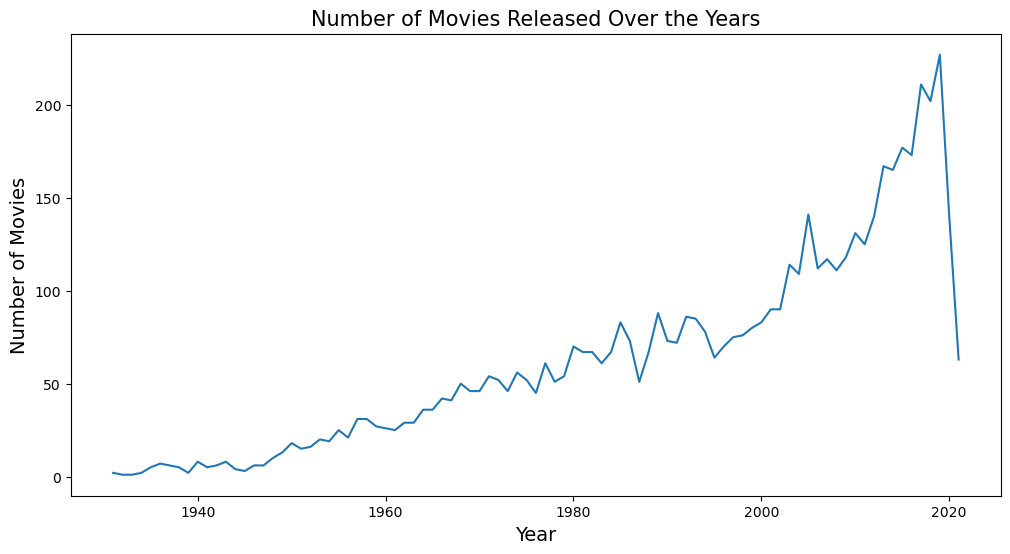

In [41]:
# Extract only numeric part from 'Year' column
df['Year'] = df['Year'].str.extract('(\d+)')

# Convert the 'Year' column to integers
df['Year'] = df['Year'].astype(float).astype(int)

# Group data by year and calculate the count of movies for each year
movies_by_year = df.groupby('Year').size()

# Create a time series plot for the number of movies released over the years
plt.figure(figsize=(12, 6))
plt.plot(movies_by_year.index, movies_by_year.values)
plt.title('Number of Movies Released Over the Years', fontsize=15)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Movies', fontsize=14)
plt.show()


## Top 10 high rated directors

In [49]:
#top 20 highly rated directors 

top_10_rated_movies_of_director=df[(df['Rating']>=7)]['Director'].head(10)
df.groupby(top_20_rated_movies_of_director)['Rating'].mean()

Director
Amrit Sagar                   8.1
Aparna Sen                    7.3
Dhruv Sachdev                 8.0
Gaurav Bakshi                 7.0
Jayoo Patwardhan              7.7
Konkona Sen Sharma            7.5
Krishna D.K.                  7.3
Nagesh Kukunoor               7.8
Padmakumar Narasimhamurthy    8.1
Pramod Chakravorty            7.2
Praveen Damle                 7.3
Prawaal Raman                 7.3
Rajkumar Hirani               8.4
Shoojit Sircar                7.4
Suhaib Ilyasi                 7.8
Umesh Shukla                  7.4
Vidhu Vinod Chopra            7.2
Vikram K. Kumar               7.3
Vishwesh Krishnamoorthy       7.4
Name: Rating, dtype: float64

In [50]:
# top 10 highly rated actors

top_10_rated_movies_of_actor=df[(df['Rating']>=7)]['Actor 1'].head(10)
top_10_actor=df.groupby(top_20_rated_movies_of_actor)['Rating'].mean()
top_10_actor

Actor 1
Aamir Khan             8.4
Amitabh Bachchan       7.4
Anil Kapoor            7.2
Dhruva Padmakumar      8.1
Ehan Bhat              7.4
Geeta Agrawal          7.3
Guru Dutt              7.2
Jennifer Kendal        7.5
Jimmy Sheirgill        7.4
Kalki Koechlin         7.5
Madhavan               7.3
Manoj Bajpayee         8.1
Nachiket Patwardhan    7.7
Naseeruddin Shah       7.8
Raj Nidimoru           7.3
Rajvvir Aroraa         7.3
Rasika Dugal           7.0
Sanjay Deyali          8.0
Shabana Azmi           7.1
Srishti Gautam         7.8
Name: Rating, dtype: float64

## # data preprocessing

In [53]:

datamodel = df[['Year', 'Votes', 'Duration', 'Director','Actor 1', 'Actor 2', 'Actor 3', 'Rating']]

In [54]:
director_mean_rating = datamodel.groupby('Director')['Rating'].transform('mean')
datamodel['Director_encoded'] = director_mean_rating

actor1_mean_rating = datamodel.groupby('Actor 1')['Rating'].transform('mean')
datamodel['Actor1_encoded'] = actor1_mean_rating

actor2_mean_rating = datamodel.groupby('Actor 2')['Rating'].transform('mean')
datamodel['Actor2_encoded'] = actor2_mean_rating

actor3_mean_rating = datamodel.groupby('Actor 3')['Rating'].transform('mean')
datamodel['Actor3_encoded'] = actor3_mean_rating


C:\Users\91630\AppData\Local\Temp\ipykernel_18528\53361891.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [55]:
X = datamodel[['Year', 'Votes', 'Duration', 'Director_encoded', 'Actor1_encoded', 'Actor2_encoded', 'Actor3_encoded']]
y = datamodel['Rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=24)

In [67]:
#Linear Regression
lr = LinearRegression()
lr.fit(X_train,y_train)
lr_pred = lr.predict(X_test)

In [68]:
print('Logistic Regression Model Performance: ')
print('Mean squared error: ',mean_squared_error(y_test, lr_pred))
print('Mean absolute error: ',mean_absolute_error(y_test, lr_pred))
print('R2 score: ',r2_score(y_test, lr_pred))
print()

Logistic Regression Model Performance: 
Mean squared error:  0.3935480411470793
Mean absolute error:  0.45838202331733435
R2 score:  0.7919547134060195

